In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
df_chemship = pd.read_csv("chemship.csv")
df_chemship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Case    20 non-null     int64  
 1   X1      20 non-null     int64  
 2   X2      20 non-null     float64
 3   Y       20 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 768.0 bytes


In [4]:
island_lm = ols('Y ~ X1 + X2', data = df_chemship).fit()
print(island_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     641.6
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           9.76e-17
Time:                        17:28:46   Log-Likelihood:                -61.272
No. Observations:                  20   AIC:                             128.5
Df Residuals:                      17   BIC:                             131.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3243      3.111      1.069      0.3

In [6]:
print(sm.stats.anova_lm(island_lm, typ = 2))

               sum_sq    df          F        PR(>F)
X1        1187.609715   1.0  37.633850  1.101126e-05
X2        1838.204096   1.0  58.250363  6.886103e-07
Residual   536.468242  17.0        NaN           NaN


<AxesSubplot:ylabel='X2'>

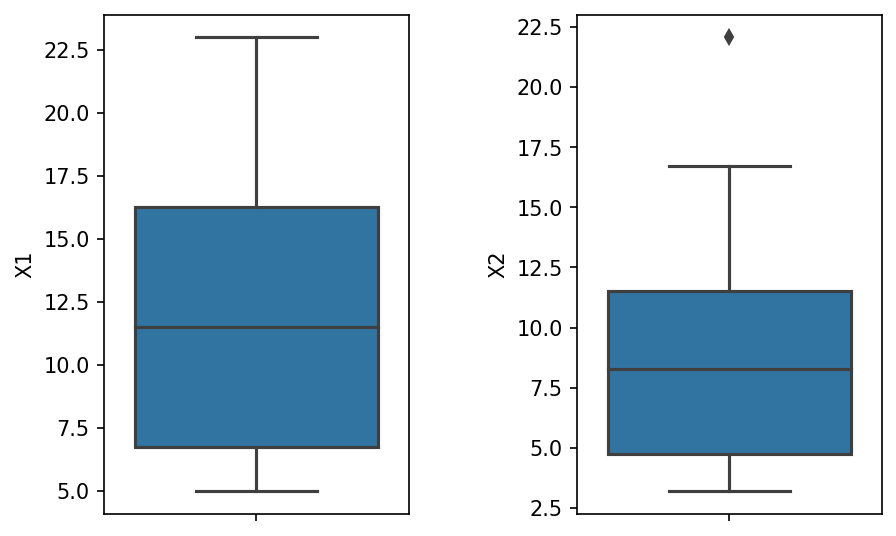

In [14]:
fig, ax = plt.subplots(1,2,figsize = (7,5), dpi = 150)
fig.tight_layout(pad = 5.0)
sns.boxplot(data = df_chemship, y = "X1", ax = ax[0])
sns.boxplot(data = df_chemship, y = "X2", ax = ax[1])

In [48]:
df_y = {'Y' : df_chemship.loc[:,"Y"].sort_values(), 'Rank' : list(range(1, len(df_chemship.loc[:,"Y"]) + 1, 1))}
df_y = pd.DataFrame(df_y)
df_y["Percentile"] = (df_y["Rank"] - 0.5) / len(df_y["Rank"])
df_y["score"] = norm.ppf(df_y["Percentile"])

Text(0, 0.5, 'Sample Quantiles')

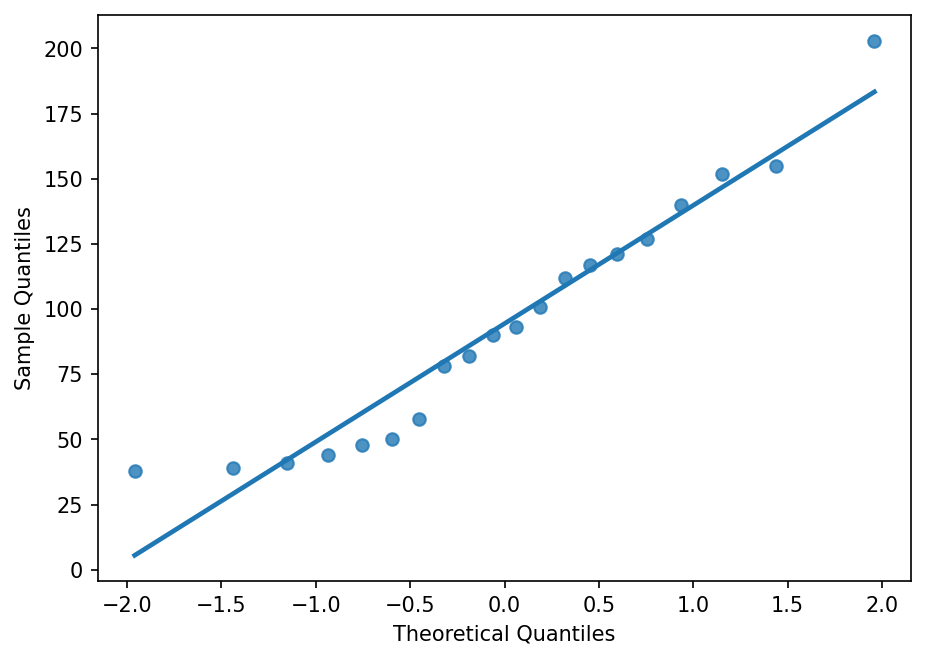

In [58]:
fig, ax = plt.subplots(figsize = (7,5), dpi = 150)
sns.regplot(x = "score", y = "Y", data = df_y, ci = None)
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

<AxesSubplot:>

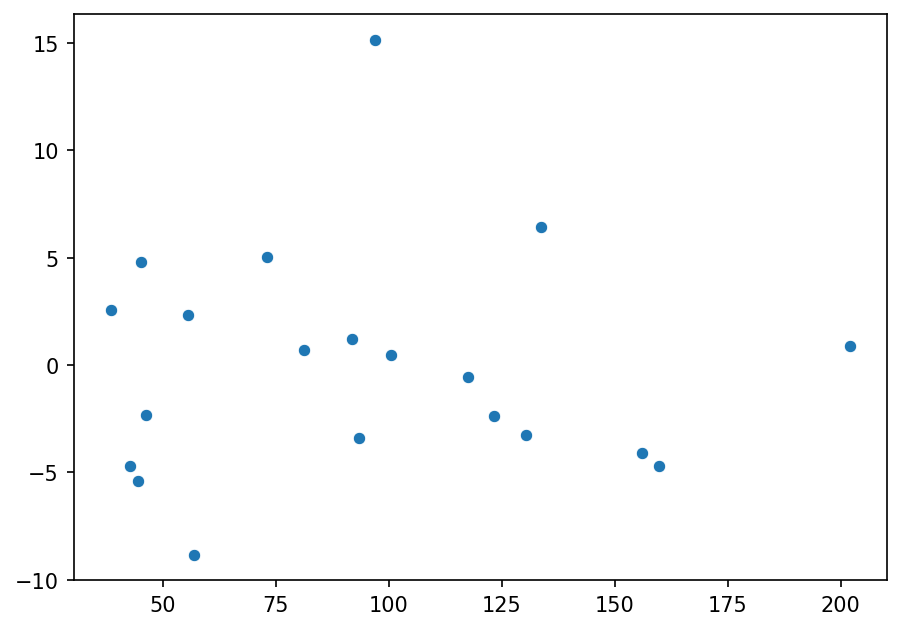

In [61]:
fig, ax = plt.subplots(figsize = (7,5), dpi = 150)
sns.scatterplot(y = island_lm.resid, x = island_lm.fittedvalues)

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (7,5), dpi = 150)
fig.tight_layout(pad = 5.0)
sns.scatterplot(x = df_chemship["X1"], y = island_lm.resid, ax = ax[0])
sns.scatterplot(x = "X2", ax = ax[1])